In [39]:
import os
import pandas as pd
import warnings
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
#import plotly.express as px
#from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import dendrogram, linkage
from kmodes.kmodes import KModes

In [6]:
warnings.filterwarnings('ignore')
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'

#Valores escalonados
df = pd.read_csv(path + 'bankmarketing.csv', sep = ',')
df_2 = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
df_2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [8]:
df_3 = df_2.copy()
df_3['age_range'] = pd.cut(df_3['age'], [0,20,30,40,50,60,70,80,90,100], 
                           labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100', ])
df_3 = df_3.drop('age', axis = 1)
df_3.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [10]:
df_3.dtypes

job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
poutcome         object
age_range      category
dtype: object

In [11]:
df_3.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age_range      0
dtype: int64

In [12]:
df_3.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [14]:
df_4 = df_3.apply(preprocessing.LabelEncoder().fit_transform)
df_4.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_range
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [16]:
custo = []
for num_clusters in list(range(1,10)):
    cluster_kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose = 0)
    cluster_kmode.fit_predict(df_4)
    custo.append(cluster_kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0
Initiali

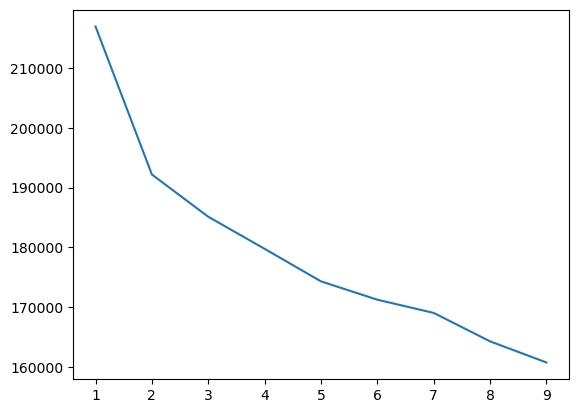

In [20]:
y = np.array([i for i in range (1,10,1)])
plt.plot(y, custo)

In [21]:
cluster_kmodes = KModes(n_clusters = 4, verbose = 1)
clusters = cluster_kmodes.fit_predict(df_4) 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [23]:
cluster_id_column = pd.DataFrame(clusters, columns = ['ClusterID'])

In [25]:
df_5 = pd.concat([df_2, cluster_id_column], axis = 1)
df_5.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,ClusterID
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1


In [26]:
df_5.iloc[332, :]


age                     35
job             management
marital            married
education      high.school
default                 no
housing                yes
loan                    no
contact          telephone
month                  may
day_of_week            mon
poutcome       nonexistent
ClusterID                0
Name: 332, dtype: object

In [36]:
#Amostras com ruído.
df_6 = df_5.loc[df_5.ClusterID == 3]
df_6.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,ClusterID
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,3
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,3
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,nonexistent,3
53,53,admin.,single,professional.course,no,no,no,telephone,may,mon,nonexistent,3
55,55,technician,married,professional.course,unknown,yes,no,telephone,may,mon,nonexistent,3


In [38]:
df_6.shape

(3570, 12)

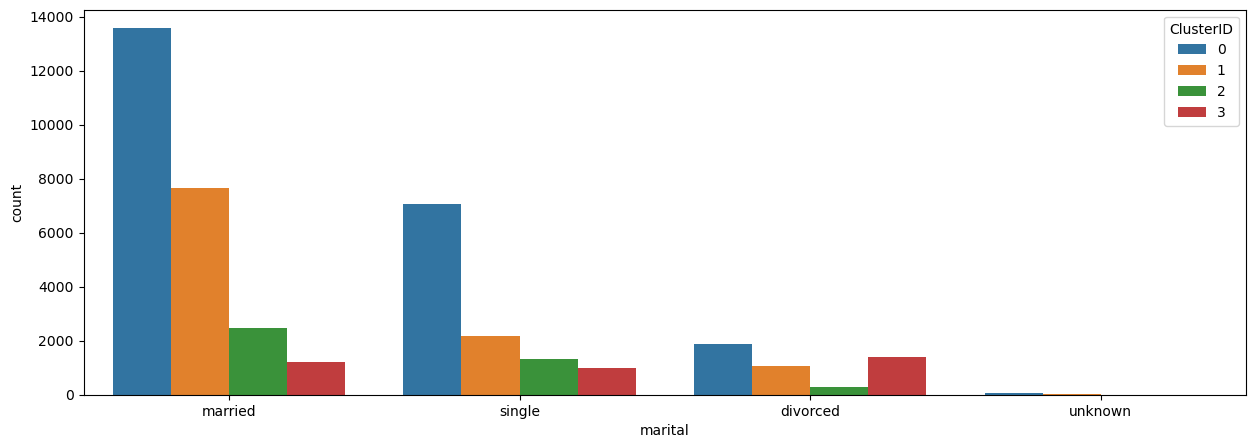

In [41]:
plt.subplots(figsize = (15,5))
sb.countplot(x= df_5['marital'], order = df_5['marital'].value_counts().index, hue = df_5['ClusterID'])
plt.show()